In [1]:
import ROOT
from IPython.display import display, Math, Latex
import rootnotes



Welcome to JupyROOT 6.10/05


## Import Samples

In [2]:
%run interactiveStackTree.py --baseDir /data/users/jkunkle/Resonances/LepGamma_elg_2018_03_28/ --samplesConf Modules/Resonance.py --xsFile cross_sections/photon15.py --lumi 35900. --treeName UMDNTuple/EventTree --fileName tree.root


-------------------------------------
 LOAD CROSS SECTION INFO
-------------------------------------
Sample GJets_HT-600ToInf              cross section : 93.380000 pb     N Events : 2463946  sample lumi : 26386.228314      Scale : 1.360558      
Sample WZ3LNLO                        cross section : 5.260000 pb      N Events : 8260201  sample lumi : 1570380.418251    Scale : 0.022861      
Sample WJetsToLNu_HT-800To1200        cross section : 7.484300 pb      N Events : 1544513  sample lumi : 206367.061716     Scale : 0.173962      
Sample WJetsToLNu_HT-600To800         cross section : 16.288000 pb     N Events : 3779141  sample lumi : 232019.953340     Scale : 0.154728      
Sample GJets_HT-100To200              cross section : 9226.000000 pb   N Events : 5131873  sample lumi : 556.240299        Scale : 64.540451     
Sample ResonanceMass2000              cross section : 0.000172 pb      N Events : 50000    sample lumi : 289872165.921251  Scale : 0.000124      
Sample TTJets_SingleLep

In [3]:
base = 'ph_n>=1 && el_n==1'
baseeta = base + ' && abs(ph_eta[0])<1.4'
a3 = '&& ph_passEleVeto[0]==1' #CSEV
b3 = '&& ph_passEleVeto[0]==0' 
a4 = '&& ph_hasPixSeed[0]==0'  #Pixel seed
b4 = '&& ph_hasPixSeed[0]==1'

xbin = range(0,50,2)+[50,52,54,60,65,75,80]
hist_config = {'colors' : [ROOT.kRed, ROOT.kBlack], 'doratio' : 1,'xlabel':'MET','rlabel':'red/black' , 'normalize':1}

## Fill and plot histogram

In [4]:
samples.CompareSelections(['met_pt']*2, [baseeta+a4, baseeta+b4] ,['Z+jets']*2, xbin,\
                          hist_config,{},{'legend_entries':['pass: fakes','fail: electron']}  )
samples.curr_canvases['top'].cd()
samples.samples[-2].hist.GetYaxis().UnZoom()
ROOT.gPad.Modified()
ROOT.gPad.Update()

Case when multiple vars is used is not implemented
Creating hist for met_pt
met_pt : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_hasPixSeed[0]==0 
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 60, 65, 75, 80]
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
met_pt : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_hasPixSeed[0]==0 
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 60, 65, 75, 80]
Scale DYJetsToLL_M-50 by 4.211637
RUN GROUPING FOR met_pt
['DYJetsToLL_M-50']
Scale met_pt by 1.000000
Creating hist for met_pt_0
met_pt : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_hasPixSeed[0]==1 
[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 60, 65, 75, 80]
Draw grouped hist DYJetsToLL_M-50
Creating hist for DYJetsToLL_M-50
met_pt : ph_n>=1 && el_n==1 && abs(ph_eta[0])<1.4&& ph_hasPixSeed[0

Error in <TGClient::TGClient>: can't open display "", switching to batch mode...
 In case you run from a remote ssh session, reconnect with ssh -Y


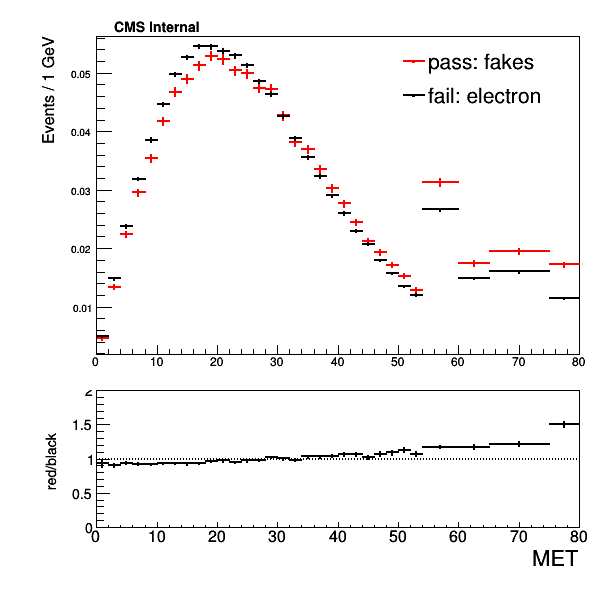

Info in <TCanvas::Print>: png file /tmp/tmpU9fcGI.png has been created


In [5]:
samples.curr_canvases['base']


|          |MET<25     |MET>25     |
|----------|-----------|-----------|
|pass eVeto|A          |Signal|
|fail eVeto|B     | D    |

## Fitting

We now try to fit the ratio histogram found above with a 2-polynomial/ quadratic. That way we measure the weights needed to correct for the biases 

The chi square fit minimizes

$$S = \sum\frac{(y-y_{0})^{2}}{\sigma_{y}^{2}}$$


The likelihood fit tries to minimize what is the log of likelihood ratio

$$S= -2 \frac{log(L_{0})}{log(L)}$$

In [6]:
samples.curr_canvases["same"].cd()
h = samples.samples[-1].hist
h.Draw()
h.GetXaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleSize(0.05)
h.GetYaxis().SetTitleOffset(1)
h.GetYaxis().SetLabelSize(0.05)
h.GetXaxis().SetLabelSize(0.05)
ROOT.gStyle.SetOptFit(1)
h.SetStats(1)

In [7]:
h.Fit("pol2","S")


****************************************
Minimizer is Linear
Chi2                      =      31.1677
NDf                       =           28
p0                        =     0.923682   +/-   0.0128222   
p1                        =  0.000196403   +/-   0.000870302 
p2                        =  6.97925e-05   +/-   1.27331e-05 


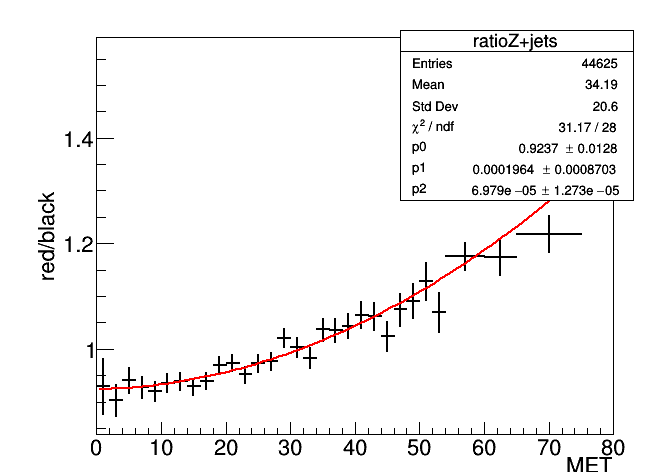

Info in <TCanvas::Print>: png file /tmp/tmp0d2LqA.png has been created


In [8]:
h.GetYaxis().UnZoom()
samples.curr_canvases["same"].Modified()
samples.curr_canvases["same"].Update()
samples.curr_canvases["same"]

In [9]:
h.Fit("pol2","SL")

 FCN=0.01422 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=5.56105e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.33876e-01   4.80809e-01   8.98209e-05   9.80082e-05
   2  p1          -9.05486e-04   3.09352e-02   2.50453e-06   1.44034e-03
   3  p2           8.74555e-05   4.27795e-04   4.74199e-08   3.43747e-02
                               ERR DEF= 0.5


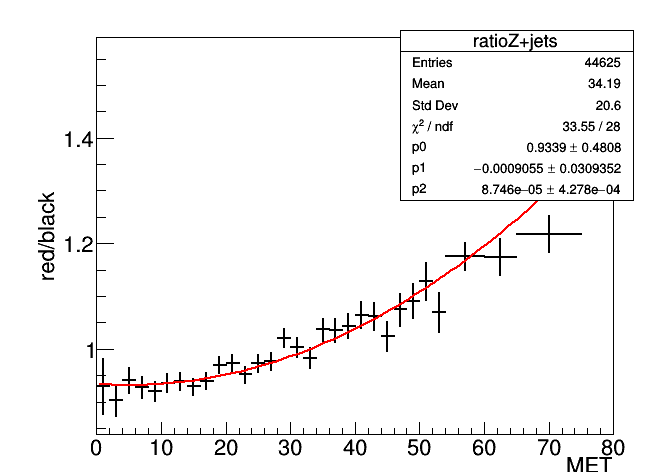

Info in <TCanvas::Print>: png file /tmp/tmpAXpX_P.png has been created


In [10]:
h.GetYaxis().UnZoom()
samples.curr_canvases["same"].Modified()
samples.curr_canvases["same"].Update()
samples.curr_canvases["same"]
